### Imports

In [1]:
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
import logging
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import argparse
import sys
import time
import os
import logging
import yaml
import shutil
import numpy as np
import tensorboardX
import torch.optim as optim
import torchvision
#from image_transformer import ImageTransformer
import matplotlib
import itertools
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchviz import make_dot
from tqdm import tqdm
import torch.nn as nn
import torch.distributions as dist

In [29]:
for i in range(1, 2, 1):
    print(i)

1


### Stacking Tensors

In [28]:
X = torch.zeros(256, 60)
print(X[: , 0:2].size())

torch.Size([256, 2])


### Are Log Probabilites Calculated Elementwise

In [20]:
y_1 = torch.zeros(4, 1)
y_2 = torch.ones(4, 1)
y_com = torch.cat([y_1, y_2], dim =1)

In [21]:
y_com = torch.unsqueeze(y_com, dim=2)

In [22]:
print(y_com.size())

torch.Size([4, 2, 1])


In [24]:
print(y_com[:, 0:1, :])

tensor([[[0.]],

        [[0.]],

        [[0.]],

        [[0.]]])


In [ ]:
torch.tensor([])
q_theta = dist.VonMises(torch.squeeze(Y[:, 0, :]), torch.squeeze(Y[:, 1, :]))
loss_sum = torch.sum(q_theta.log_prob(X))

### Stacking Tensors Part 2

In [60]:
h = torch.zeros([256, 10, 2])
#y = torch.zeros([256, 2, 2])

h_new = torch.zeros([256, 10])
#y_new = torch.zeros([256, 2])

In [62]:
h = torch.cat([h, h_new], dim = 2)
#y = torch.stack([y, y_new], dim = 2)

### Practice Splicing

In [41]:
X = torch.zeros(256, 60)

In [49]:
X[:, 59:61].size()

torch.Size([256, 1])

### Practice Stacking Tensors

In [34]:
h_0  = torch.zeros(16, 10)
h_1 = torch.zeros(16, 10)

print(h_0.size(), h_1.size())
h = torch.stack([h_0, h_1], dim = 2)
print(h.size())

torch.Size([16, 10]) torch.Size([16, 10])
torch.Size([16, 10, 2])


In [38]:
h[:, :, 1].size()

torch.Size([16, 10])

In [19]:
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.linear = nn.Linear(3, 10)

    def forward(self, X):
        result = self.linear(torch.cat([X, torch.zeros(64, 1)], 1))
        return result

device = torch.device("cpu")
model = MyModule().to(device)
model(torch.zeros(64, 2))

tensor([[-0.4529, -0.0311,  0.4409, -0.4398, -0.5117, -0.2386,  0.1602, -0.4757,
         -0.2209,  0.3956],
        [-0.4529, -0.0311,  0.4409, -0.4398, -0.5117, -0.2386,  0.1602, -0.4757,
         -0.2209,  0.3956],
        [-0.4529, -0.0311,  0.4409, -0.4398, -0.5117, -0.2386,  0.1602, -0.4757,
         -0.2209,  0.3956],
        [-0.4529, -0.0311,  0.4409, -0.4398, -0.5117, -0.2386,  0.1602, -0.4757,
         -0.2209,  0.3956],
        [-0.4529, -0.0311,  0.4409, -0.4398, -0.5117, -0.2386,  0.1602, -0.4757,
         -0.2209,  0.3956],
        [-0.4529, -0.0311,  0.4409, -0.4398, -0.5117, -0.2386,  0.1602, -0.4757,
         -0.2209,  0.3956],
        [-0.4529, -0.0311,  0.4409, -0.4398, -0.5117, -0.2386,  0.1602, -0.4757,
         -0.2209,  0.3956],
        [-0.4529, -0.0311,  0.4409, -0.4398, -0.5117, -0.2386,  0.1602, -0.4757,
         -0.2209,  0.3956],
        [-0.4529, -0.0311,  0.4409, -0.4398, -0.5117, -0.2386,  0.1602, -0.4757,
         -0.2209,  0.3956],
        [-0.4529, -

### ModulesList

In [14]:
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.linears = nn.ModuleList([nn.Linear(10, 10) for i in range(10)])

    def forward(self, x):
        print(self.linears[0])
        #ModuleList can act as an iterable, or be indexed using ints
        #For index, layer in enumerate(self.linears):
            #print("i: ", i), print("l: ", l)
            #print("Hello is anyone there")
            #x = self.linears[index // 2](x) + layer(x)

        return x

device = torch.device("cpu")
model = MyModule().to(device)
model(torch.zeros(1, 10))

Linear(in_features=10, out_features=10, bias=True)


tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [3]:
#args, config = parse_args_and_config()
#if config.model.distr == "dmol":
model_image_size = 8
model_channels = 3
model_batch_size = 16

transform = transforms.Compose([
    transforms.Resize(model_image_size), #model image size, so image is 8 by 8
    transforms.ToTensor()
])

dataset = datasets.CIFAR10('datasets/transformer', transform=transform , download=True)
loader = DataLoader(dataset, batch_size = model_batch_size, shuffle=True, num_workers=4)
input_dim = model_image_size ** 2 * model_channels
#model = ImageTransformer(config.model).to(config.device)
#optimizer = optim.Adam(model.parameters(), lr=1., betas=(0.9, 0.98), eps=1e-9)
#scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda step: get_lr(step, config))

Files already downloaded and verified


In [4]:
device = torch.device("cpu")
for what, (imgs, l) in enumerate(loader):
    imgs = imgs.to(device)
    print(type(what))
    print(type(imgs))
    print(type(l))
    break

imgs.size()

<class 'int'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


torch.Size([16, 3, 8, 8])

The batch size is 16, and we have 3 channels (RGB). The images are 32 by 32. Lets examine a single image; which turns out to be a picture of a bird. 

Note that transforms.ToTensor() does the following:
Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8

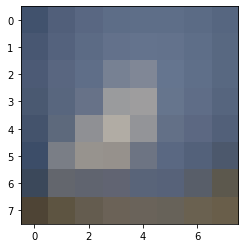

In [5]:
img = imgs[0, :, :, :]
img.size()
plt.imshow(img.permute(1, 2, 0))

In [6]:
torch.set_printoptions(profile="full")
print(img)

KeyboardInterrupt: 

For [categorical distributions], each of the input pixels' three color channels is encoded using a channel specific set of 256 d-dimensional embedding vectors of the intensity values 0-255. 

Code up a Pytorch model to generate embeddings...

According to the official documentation of Pytorch embeddings:

num_embeddings (int) – size of the dictionary of embeddings

embedding_dim (int) – the size of each embedding vector 

In [7]:
num_pixels = model_image_size**2
hidden_size = 16

class Embedder(nn.Module):
    """ImageTransformer with DMOL or categorical distribution."""
    def __init__(self):
        super().__init__()
        self.embeds = nn.Embedding(num_pixels * model_channels, hidden_size)

In [50]:
from torch.nn import Embedding 

n_embeddings, dim = 10, 4

emb_1 = Embedding(10, 1)

In [54]:
print(emb_1)
print(emb_1.weight)
inp =  torch.LongTensor([[1], [2]])
print(inp)
print(inp.size())
embedded = emb_1(inp)
embedded.size()
print(embedded)

Embedding(10, 1)
Parameter containing:
tensor([[-0.3890],
        [ 1.4295],
        [-0.6874],
        [-0.7585],
        [ 0.0335],
        [-0.1820],
        [-1.4105],
        [-1.8211],
        [-0.5155],
        [ 0.4665]], requires_grad=True)
tensor([[1],
        [2]])
torch.Size([2, 1])
tensor([[[ 1.4295]],

        [[-0.6874]]], grad_fn=<EmbeddingBackward>)
